# Time series analysis on the data International Airline passengers from 1940 to 1960

In [41]:
# import libraries
# %pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [42]:
# data fetch from github
df = pd.read_csv("AirPassengers.csv")
df.head(10)


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [43]:
df.shape

(144, 2)

<Axes: xlabel='Month', ylabel='Passengers'>

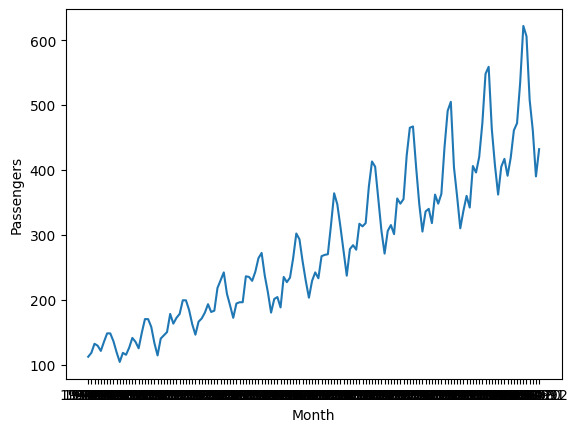

In [44]:
# plot this data to see trends and seasonality with seaborn
sns.lineplot(x="Month", y="Passengers", data=df)


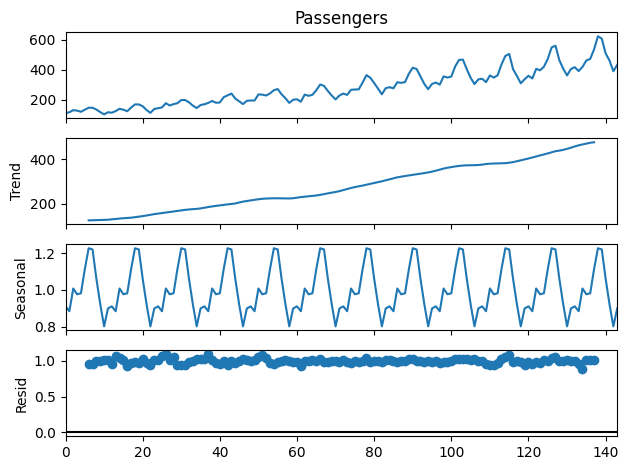

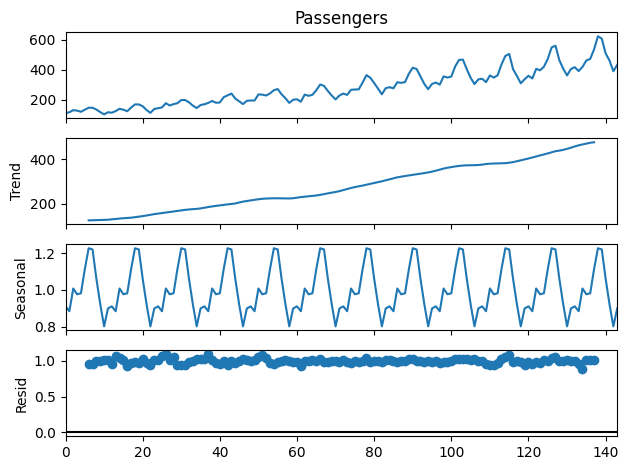

In [45]:
# decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df["Passengers"], model="multiplicative", period=12)
decompose.plot()

<Axes: >

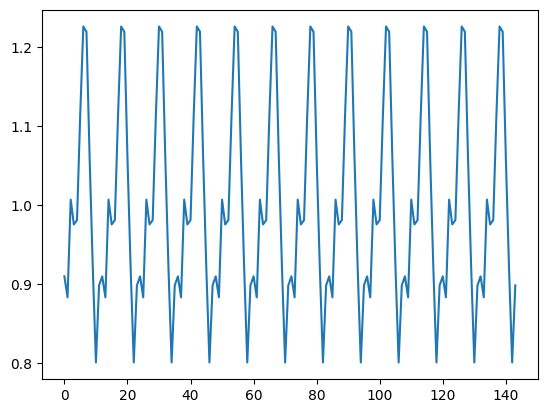

In [46]:
decompose.seasonal.plot()

In [47]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

In [48]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 32127.8145 - root_mean_squared_error: 178.9279
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18455.5312 - root_mean_squared_error: 135.4333
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7937.2979 - root_mean_squared_error: 88.9372
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3734.1550 - root_mean_squared_error: 60.4104
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 944.8615 - root_mean_squared_error: 30.6792
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 471.3898 - root_mean_squared_error: 21.6897
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 467.4881 - root_mean_squared_error: 21.6117
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 472.1472 - root_mean_squared_error: 21.7035
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 496.8222 - root_mean_squared_error: 22.2661
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - l

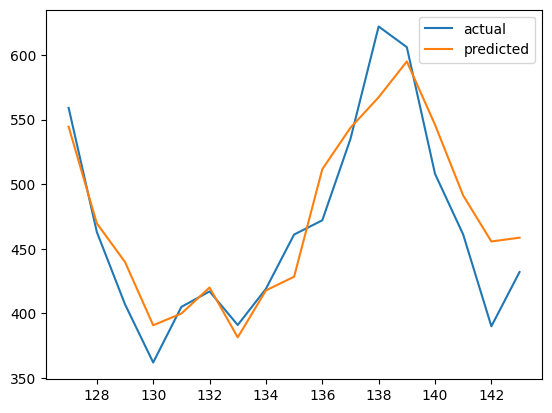

CPU times: total: 9.17 s
Wall time: 34.4 s


In [49]:
%%time
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["Passengers"].values[n_lags:])
X_test = np.array([test["Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()


----------